# MNIST DATASET - TENSORFLOW

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [5]:
from tensorflow.examples.tutorials.mnist import input_data

In [16]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [17]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000209E9DF34C8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000209EAAD86C8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000209EAAD8E48>)

In [18]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000, 10))

In [19]:
mnist.train.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [20]:
mnist.test.images.shape

(10000, 784)

In [21]:
mnist.validation.images.shape

(5000, 784)

### To load the Image

<function matplotlib.pyplot.show(*args, **kw)>

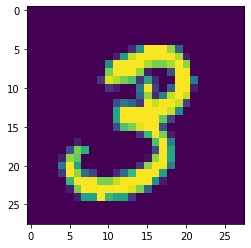

In [24]:
from matplotlib import pyplot as plt
first_image = mnist.train.images[1]
first_image = np.array(first_image, dtype='float')
first_image = first_image.reshape(28,28)
plt.imshow(first_image)
plt.show

### Initialising Weights and Biases

In [26]:
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10
weights = {
    'h1' : tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out' : tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'h1' : tf.Variable(tf.random_normal([n_hidden_1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

### Forward Propagation

In [27]:
def forward_propagation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1, weights['h2']), biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2, weights['out']), biases['out'])
    return output

### Predictions and Accuracy

In [35]:
x = tf.placeholder("float",[None,n_input])
y = tf.placeholder(tf.int32,[None,n_classes])
pred = forward_propagation(x, weights, biases)

In [39]:
predictions = tf.argmax(pred, 1)
true_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, true_labels)

In [42]:
predictions_eval, labels, correct_pred = sess.run([predictions, true_labels, correct_predictions], feed_dict = {x:mnist.train.images, y:mnist.train.labels})
predictions_eval, labels, correct_pred

(array([9, 1, 0, ..., 9, 0, 1], dtype=int64),
 array([7, 3, 4, ..., 5, 6, 8], dtype=int64),
 array([False, False, False, ..., False, False, False]))

In [43]:
correct_pred.sum()

5584

### Optimzer

In [91]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels =y))

In [92]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)

In [100]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [101]:
batch_size = 100
for i in range(25):
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        c, _ = sess.run( [cost,optimize], feed_dict = {x:batch_x, y: batch_y})
        total_cost +=c
    print(total_cost)

24930.439908385277
4633.030535098314
2615.686064048252
1907.6241249271307
1520.1237495737332
1314.9071286929784
1112.5434851383975
977.6188726491705
925.2369469337365
893.4657037528966
714.9681486076752
580.9893309301216
479.0621110195216
492.9938104874208
460.6806543513654
408.16969852674725
413.2821874059701
376.5263672297671
269.1814496574904
244.09171437270788
239.03398475986188
287.0328364010363
201.26540350903088
182.8787084946174
158.49884397517224


In [102]:
predictions = tf.argmax(pred, 1)
true_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, true_labels)
predictions_eval, labels, correct_pred = sess.run([predictions, true_labels, correct_predictions], feed_dict = {x:mnist.test.images, y:mnist.test.labels})
predictions_eval, labels, correct_pred

(array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([ True,  True,  True, ...,  True,  True,  True]))

In [103]:
correct_pred.sum()

9639

Reached accuracy of 96.39%

# Keras

In [121]:
from keras.models import Sequential
model = Sequential()

In [122]:
from keras.layers import Dense
layer1 = Dense(units=32, activation = 'relu', input_dim = 30)
model.add(layer1)
model.add(Dense(units=16, activation = 'relu'))
model.add(Dense(units=1, activation = 'sigmoid'))

In [123]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [124]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
cancer  = datasets.load_breast_cancer()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [125]:
model.fit(x_train, y_train, epochs=40, batch_size=50, validation_data = (x_test, y_test))

Train on 455 samples, validate on 114 samples
Epoch 1/40
455/455 [==============================] - 0s 1ms/step - loss: 0.7264 - accuracy: 0.5978 - val_loss: 0.6544 - val_accuracy: 0.6053
Epoch 2/40
455/455 [==============================] - 0s 53us/step - loss: 0.5145 - accuracy: 0.7319 - val_loss: 0.5065 - val_accuracy: 0.8333
Epoch 3/40
455/455 [==============================] - 0s 46us/step - loss: 0.3895 - accuracy: 0.8769 - val_loss: 0.4062 - val_accuracy: 0.8596
Epoch 4/40
455/455 [==============================] - 0s 57us/step - loss: 0.3038 - accuracy: 0.9253 - val_loss: 0.3402 - val_accuracy: 0.8596
Epoch 5/40
455/455 [==============================] - 0s 55us/step - loss: 0.2448 - accuracy: 0.9341 - val_loss: 0.2938 - val_accuracy: 0.8772
Epoch 6/40
455/455 [==============================] - 0s 70us/step - loss: 0.2008 - accuracy: 0.9407 - val_loss: 0.2593 - val_accuracy: 0.9123
Epoch 7/40
455/455 [==============================] - 0s 46us/step - loss: 0.1694 - accuracy: 0.9

In [126]:
predictions = model.predict(x_test)
predictions

array([[5.2582920e-03],
       [9.7329676e-01],
       [9.9923855e-01],
       [9.9632192e-01],
       [9.9881774e-01],
       [9.9733222e-01],
       [9.9975336e-01],
       [9.9899399e-01],
       [9.9996448e-01],
       [9.9998093e-01],
       [8.7178206e-01],
       [8.7376857e-01],
       [9.9995589e-01],
       [7.7532768e-02],
       [7.3584867e-01],
       [6.3335001e-03],
       [9.9986684e-01],
       [4.4286251e-05],
       [3.5554171e-05],
       [2.0861626e-07],
       [3.6800504e-03],
       [1.6744494e-02],
       [9.8777896e-01],
       [9.9856931e-01],
       [1.1300445e-03],
       [9.9959922e-01],
       [9.9996531e-01],
       [7.3122382e-03],
       [9.9906445e-01],
       [3.5464764e-06],
       [9.9983811e-01],
       [3.2502413e-04],
       [9.6048689e-01],
       [3.5636425e-03],
       [9.9999285e-01],
       [1.7515123e-03],
       [9.9201369e-01],
       [4.9054623e-04],
       [9.9392736e-01],
       [1.6689003e-03],
       [7.0414126e-02],
       [9.998693

In [127]:
score = model.evaluate(x_test, y_test)
score

114/114 [==============================] - 0s 61us/step


[0.13763555518367834, 0.9736841917037964]